<a href="https://colab.research.google.com/github/roshank1605A04/Fraud-Detection-in-Online-Transactions/blob/master/Fraud_detection_in_financial_payment_services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# Data Visulaization

In [2]:
#loading data
df = pd.read_csv('/kaggle/input/fraud-dataset/Fraud.csv')


In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#describing the data

df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
#shape of the data frame
df.shape

(6362620, 11)

In [7]:
#Classes in type column
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
#Total class counts of type column
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

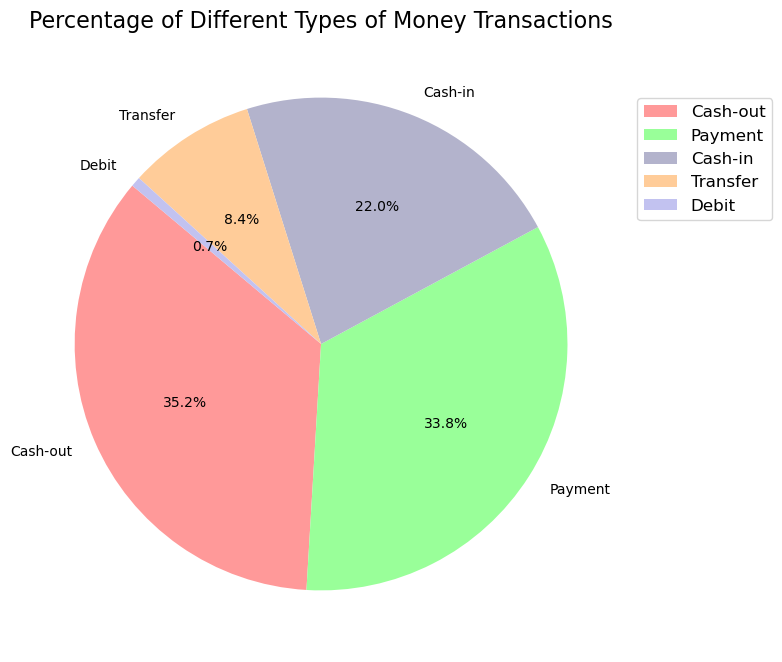

In [9]:
import matplotlib.pyplot as plt

labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
sizes = ['2237500','2151495','1399284','532909', '41432' ]  
colors = ['#ff9999', '#99ff99', '#b3b3cc', '#ffcc99', '#c2c2f0']


plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(sizes, labels=labels, colors=colors, shadow=False, autopct='%1.1f%%', startangle=140)

# Adding percentage labels inside each slice
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Moving the legend outside the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8), fontsize=12)

plt.title('Percentage of Different Types of Money Transactions', fontsize=16)
plt.show()


In [10]:
fraud_counts = df['isFraud'].value_counts()
fraud_counts

0    6354407
1       8213
Name: isFraud, dtype: int64

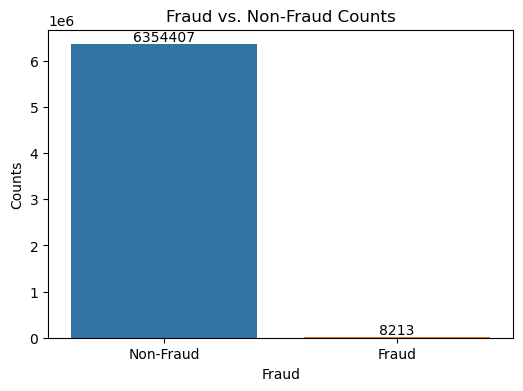

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame called 'data' with a column 'isFraud'
fraud_counts = df['isFraud'].value_counts()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xlabel('Fraud')
plt.ylabel('Counts')
plt.title('Fraud vs. Non-Fraud Counts')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])

# Adding count labels on top of the bars
for i, count in enumerate(fraud_counts.values):
    ax.text(i, count + 100, str(count), ha='center', va='bottom')

plt.show()

# 1. Data cleaning including missing values, outliers and multi-collinearity. 

## a. Finding Missing Values 

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### There is no NAN values or null values

# Removing Outliers

In [13]:
df.shape

(6362620, 11)

In [14]:


import pandas as pd
from scipy import stats

# Assuming 'df' is your DataFrame with numerical columns

def find_outliers_zscore(series, threshold=3):
    z_scores = stats.zscore(series)
    outliers = series[abs(z_scores) > threshold]
    return outliers

# Find outliers for each column
outliers_dict = {}
for col in df.columns:
    if df[col].dtype in [int, float]:
        outliers_dict[col] = find_outliers_zscore(df[col])

# Concatenate all outlier index labels
all_outliers = pd.concat(outliers_dict.values()).drop_duplicates()

# Remove outliers from DataFrame if they exist
if not all_outliers.empty:
    df = df.drop(all_outliers.index)

# Now 'df' DataFrame contains the rows without identified outliers


In [15]:

df.shape

(6098838, 11)

#### The change in the shape of the dataframe indicates that the removal of outliers has resulted in a reduction in the number of data points.

# Identifying Correlation Between Variables. 

/tmp/ipykernel_28/460388880.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.4f', linewidths=0.5)


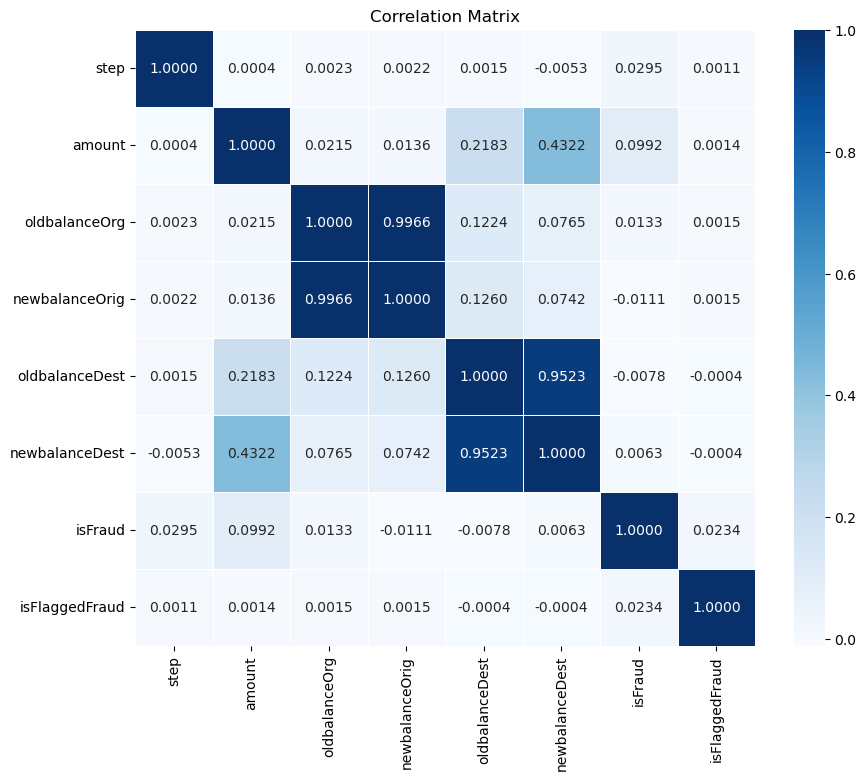

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.4f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### The newbalanceOrig feature is correlated with the oldbalanceOrig feature. This correlation is expected as these columns involve changes in balances due to transactions made by the account holders. Similarly, the newbalanceDest feature is correlated with the oldbalanceDest feature. This correlation is also expected because these columns represent the balance changes in destination accounts resulting from incoming transactions.


#### The correlations in both cases are natural consequences of the transaction process, where amounts are subtracted from one account and added to another.

#### Since there is no significant correlation between unrelated variables, it is reasonable to retain all columns in the dataset. This allows us to preserve all relevant information for analysis and modeling without removing any potentially valuable features.

# Eliminating Irrelevant Columns

## The columns 'nameorig' and 'namedest' have been identified as irrelevant since they do not impact the dependent variable 'fraud'.

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


In [18]:
drop_columns = ['nameOrig','nameDest']
df = df.drop(drop_columns, axis =1)

In [19]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0


#### Here columns 'nameorig' and 'namedest' have been successfully removed.

# Converting categorical variables into numeric representation

In [20]:
# Label Encoding the type variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

In [21]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,3,7817.71,53860.0,46042.29,0.0,0.0,0,0


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop("isFraud",axis=1).values
Y = df["isFraud"].values
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)



Shape of x:  (6098838, 8)
Shape of y:  (6098838,)


In [23]:
Y = pd.Series(Y)

# Now you can call value_counts() on 'y'
Y_counts = Y.value_counts()
Y_counts

0    6091569
1       7269
dtype: int64

**OVER-SAMPLING**

In [28]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming you have already defined 'X' as your feature data and 'Y' as the target variable

# Calculate the value counts of each class in 'Y'
Y_counts = Y.value_counts()

# Find the class with the lowest count (fraud class)
fraud_class = Y_counts.idxmin()

# Get the count of the majority class (non-fraud class)
majority_count = Y_counts.max()

# Calculate the amount of oversampling required to reach 5,000,000 samples for the fraud class
#desired_fraud_count = 5000000
oversample_amount = 3045784

# Initialize SMOTE
smote = SMOTE(sampling_strategy={fraud_class: oversample_amount}, random_state=0, k_neighbors=4)

# Perform SMOTE oversampling on the data
x_oversampled, y_oversampled = smote.fit_resample(X, Y)

# Now, 'x_oversampled' and 'y_oversampled' contain the synthetic samples for the fraud class,
# and the count of the fraud class (class 1) should be increased to 5,000,000


In [29]:
y = pd.Series(y_oversampled)

# Now you can call value_counts() on 'y'
y_counts = y.value_counts()
y_counts

0    6091569
1    3045784
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, test_size = 0.2, random_state = 0)


In [31]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Using XGBOOST


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Create the RandomForestClassifier object
clf = RandomForestClassifier(criterion='gini',
                             max_depth=48,
                             max_features='sqrt',
                             n_estimators=300)

# Define the batch size
batch_size = 8192

# Calculate the number of batches
num_batches = len(x_train) // batch_size

# Train the classifier in batches with a progress bar
with tqdm(total=num_batches) as pbar:
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size

        # Get the current batch of data
        x_batch = x_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]

        # Fit the classifier on the current batch
        clf.fit(x_batch, y_batch)

        # Update the progress bar
        pbar.update(1)

# Train the remaining data (if any)
remaining_data = len(x_train) % batch_size
if remaining_data > 0:
    x_remaining = x_train[-remaining_data:]
    y_remaining = y_train[-remaining_data:]
    clf.fit(x_remaining, y_remaining)

  2%|▏         | 16/892 [00:36<32:26,  2.22s/it]

In [ ]:
import pandas as pd

# Make sure x_test is a DataFrame (convert it if necessary)
if not isinstance(x_test, pd.DataFrame):
    x_test = pd.DataFrame(x_test)

# Now, you can use the classifier's predict method
y_preds = clf.predict(x_test)


In [ ]:
# looking at the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)